<h1>Итоговый проект: Flight Delay<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-DataFrame" data-toc-modified-id="Обзор-DataFrame-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор DataFrame</a></span></li><li><span><a href="#Найти-аэропорт-с-минимальной-задержкой-вылета" data-toc-modified-id="Найти-аэропорт-с-минимальной-задержкой-вылета-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Найти аэропорт с минимальной задержкой вылета</a></span><ul class="toc-item"><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация</a></span></li></ul></li><li><span><a href="#Самая-пунктуальная-авиакомпания-на-прилет-в-Los-Angeles-International-Airport" data-toc-modified-id="Самая-пунктуальная-авиакомпания-на-прилет-в-Los-Angeles-International-Airport-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport</a></span><ul class="toc-item"><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Визуализация</a></span></li></ul></li><li><span><a href="#Аэропорт-с-самой-большой-долей-руления-на-1-самолетовылет" data-toc-modified-id="Аэропорт-с-самой-большой-долей-руления-на-1-самолетовылет-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Аэропорт с самой большой долей руления на 1 самолетовылет</a></span><ul class="toc-item"><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Визуализация</a></span></li></ul></li><li><span><a href="#Построить-модель-которая-будет-выбирать-топ-3-аэропорта-прилета-(вероятность-опоздания-минимальная-–-RMSE-метрика),--в-зависимости-от-аэропорта-вылета" data-toc-modified-id="Построить-модель-которая-будет-выбирать-топ-3-аэропорта-прилета-(вероятность-опоздания-минимальная-–-RMSE-метрика),--в-зависимости-от-аэропорта-вылета-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построить модель которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика),  в зависимости от аэропорта вылета</a></span></li></ul></div>

# Обзор DataFrame

In [1]:
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import warnings
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
labels_dict = {'fontsize':14, 
              'fontweight':'bold',
              'color':'green',
             'family':'Times New Roman'}
title_dict = {'fontsize':20, 
              'fontweight':'bold',
              'color':'black',
             'family':'Times New Roman'}
plt.rcParams['figure.figsize'] = (15,10)

<b>Данные - </b>https://www.kaggle.com/usdot/flight-delays
<p><b>Описание</b> - cводная информация о количестве своевременных, задержанных, отмененных и 
измененных рейсов в США за 2015 год (5.8 млн записей)</p>
<details>
    <summary>Описание столбцов &#9660;</summary>
    <p><b>YEAR:</b> Year of the Flight Trip</p>
    <p><b>MONTH:</b> Month of the Flight Trip</p>
    <p><b>DAY:</b> Day of the Flight Trip</p>
    <p><b>DAY_OF_WEEK:</b> Day of week of the Flight Trip</p>
    <p><b>AIRLINE:</b> Airline Identifier</p>
    <p><b>FLIGHT_NUMBER:</b> Flight Identifier</p>
    <p><b>TAIL_NUMBER:</b> Aircraft Identifier</p>
    <p><b>ORIGIN_AIRPORT:</b> Starting Airport</p>
    <p><b>DESTINATION_AIRPORT:</b> Destination Airport</p>
    <p><b>SCHEDULED_DEPARTURE:</b> Planned Departure Time</p>
    <p><b>DEPARTURE_TIME:</b> WHEEL_OFF - TAXI_OUT</p>
    <p><b>DEPARTURE_DELAY:</b> Total Delay on Departure</p>
    <p><b>TAXI_OUT:</b> The time duration elapsed between departure from the origin airport gate and wheels off</p>
    <p><b>WHEELS_OFF:</b> The time point that the aircraft's wheels leave the ground</p>
    <p><b>SCHEDULED_TIME:</b> Planned time amount needed for the flight trip</p>
    <p><b>ELAPSED_TIME:</b> AIR_TIME + TAXI_IN + TAXI_OUT</p>
    <p><b>AIR_TIME:</b> The time duration between wheels_off and wheels_on time</p>
    <p><b>DISTANCE:</b> Distance between two airports</p>
    <p><b>WHEELS_ON:</b> The time point that the aircraft's wheels touch on the ground</p>
    <p><b>TAXI_IN:</b> The time duration elapsed between wheels-on and gate arrival at the destination airport</p>
    <p><b>SCHEDULED_ARRIVAL:</b> Planned arrival time</p>
    <p><b>ARRIVAL_TIME:</b> WHEELS_ON + TAXI_IN</p>
    <p><b>ARRIVAL_DELAY:</b> ARRIVAL_TIME - SCHEDULED_ARRIVAL</p>
    <p><b>DIVERTED:</b> Aircraft landed on airport that out of schedule</p>
    <p><b>CANCELLED:</b> Flight Cancelled (1 = cancelled)</p>
    <p><b>CANCELLATION_REASON:</b> Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security</p>
    <p><b>AIR_SYSTEM_DELAY:</b> Delay caused by air system</p>
    <p><b>SECURITY_DELAY:</b> Delay caused by security</p>
    <p><b>AIRLINE_DELAY:</b> Delay caused by the airline</p>
    <p><b>LATE_AIRCRAFT_DELAY:</b> Delay caused by aircraft</p>
    <p><b>WEATHER_DELAY:</b> Delay caused by weather</p>
</details>

In [3]:
flights = pd.read_csv('flights.csv', dtype={'ORIGIN_AIRPORT': str,'DESTINATION_AIRPORT': str })
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

In [4]:
flights.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airlines.head(3)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


In [6]:
airports.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


In [11]:
print(flights.info() ,airlines.info(),airports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [8]:
print('flights -', flights.shape,'\n' 'airlines - ', airlines.shape,'\n' 'airports - ', airports.shape)

flights - (5819079, 31) 
airlines -  (14, 2) 
airports -  (322, 7)


In [9]:
print('***flights***', flights.nunique(),'***airlines***', airlines.nunique(),'***airports***', airports.nunique(), sep = '\n')

***flights***
YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          930
DESTINATION_AIRPORT     930
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64
***airlines***
IATA_CODE    14
AIRLINE      14
dtype: int64
***airports***
IATA_CODE    322
AIRPORT      

In [10]:
print('***flights***', flights.isnull().sum(),'***airlines***', airlines.isnull().sum(),'***airports***', airports.isnull().sum(), sep = '\n')

***flights***
YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64
***airlines*

In [11]:
print('***flights***', flights.duplicated().sum(),'***airlines***', airlines.duplicated().sum(),'***airports***', airports.duplicated().sum(), sep = '\n')

***flights***
0
***airlines***
0
***airports***
0


In [89]:
round(flights.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.00,0.00,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.52,3.41,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.70,8.78,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.93,1.99,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.09,1757.06,1.0,730.0,1690.0,3230.0,9855.0
SCHEDULED_DEPARTURE,5819079.0,1329.60,483.75,1.0,917.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5732926.0,1335.20,496.42,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5732926.0,9.37,37.08,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5730032.0,16.07,8.90,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5730032.0,1357.17,498.01,1.0,935.0,1343.0,1754.0,2400.0


# Найти аэропорт с минимальной задержкой вылета 


<img src = 'https://pbs.twimg.com/media/ECM0Y1LWsAEEI5Z.jpg'>

<p>Для решения этой задачи нам понадобятся две таблицы <b>flights</b> и <b>airports</b></p>

In [12]:
flights.sample(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5302607,2015,11,28,6,DL,2117,N340NW,ATL,COS,1920,...,2041.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
928178,2015,3,2,1,OO,5649,N961SW,DEN,BUR,1855,...,2059.0,28.0,0,0,NaN,24.0,0.0,4.0,0.0,0.0
434376,2015,1,29,4,EV,4158,N16183,BOS,CLE,1354,...,1602.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3027158,2015,7,9,4,UA,1702,N73270,EWR,FLL,1201,...,1540.0,36.0,0,0,NaN,0.0,0.0,36.0,0.0,0.0
2564910,2015,6,11,4,DL,2349,N323US,SFO,SLC,1635,...,2001.0,33.0,0,0,NaN,8.0,0.0,1.0,24.0,0.0


In [13]:
airports.head(5)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


Проверим совпадают ли значения в столбцах для объединения или нет

In [14]:
print(flights.ORIGIN_AIRPORT.nunique())
print(airports.IATA_CODE.nunique())
print('Разница - ',flights.ORIGIN_AIRPORT.nunique()-airports.IATA_CODE.nunique())

930
322
Разница -  608


In [15]:
col1 = flights.ORIGIN_AIRPORT.to_list()
col2 = airports.IATA_CODE.to_list()
print('Разница - ', len(set.difference(set(col1), set(col2))),'\n''Значения - ', set.difference(set(col1), set(col2)))

Разница -  608 
Значения -  {'10257', '15607', 10257, '11013', '13303', 10268, 12323, 10279, '12888', '11624', 12335, '15249', 12339, 12343, '13459', 10299, '13029', '14256', '10731', '10136', '10732', '10685', 10333, 12389, '12898', '14108', 12391, '11641', '10268', '13232', 12402, '15027', 14457, '13296', 10372, '11648', '11617', 14487, 14489, 12441, 14492, 10397, 12448, 12451, '11996', 10408, '14905', 10423, 14520, 14524, 12478, 10431, 10434, '12945', 14543, '11252', '10990', 12511, 10469, 12519, '14674', '11193', '10868', 14570, 14574, 12523, 14576, 14588, '11898', '11433', '12953', 10529, '15841', 14633, 14635, '14576', 10551, '11618', '15497', '14828', '13127', '11637', 10561, '10739', '11577', 10577, 14674, 10581, 14679, '11823', '12891', '10208', 14683, 14685, 14689, '13158', '11537', 10599, 14696, 14698, '11865', '13198', 14709, 14711, 10620, '11471', '11980', 10627, 10631, 14730, '13204', 14747, '13487', '13184', '11540', '14109', 14771, '11315', '15096', 10685, '15304', 1478

В таблице <b>flights</b> название аэропорта зашифровано пятизначным кодом. Рассмотрим таблицу <b>flights</b> отфильтровав значения в столбце <b>ORIGIN_AIRPORT</b>
которые содержат пятизначный код

In [16]:
dff = flights[flights['ORIGIN_AIRPORT'].map(str).apply(len)>3]
dff.nunique()

YEAR                      1
MONTH                     1
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  13
FLIGHT_NUMBER          5974
TAIL_NUMBER            4326
ORIGIN_AIRPORT          608
DESTINATION_AIRPORT     608
SCHEDULED_DEPARTURE    1150
DEPARTURE_TIME         1360
DEPARTURE_DELAY         644
TAXI_OUT                149
WHEELS_OFF             1366
SCHEDULED_TIME          433
ELAPSED_TIME            615
AIR_TIME                590
DISTANCE               1209
WHEELS_ON              1438
TAXI_IN                 108
SCHEDULED_ARRIVAL      1329
ARRIVAL_TIME           1435
ARRIVAL_DELAY           669
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       3
AIR_SYSTEM_DELAY        313
SECURITY_DELAY           51
AIRLINE_DELAY           534
LATE_AIRCRAFT_DELAY     394
WEATHER_DELAY           243
dtype: int64

In [17]:
dff.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4385712,2015,10,1,4,AA,1230,N3DBAA,14747,11298,5,...,543.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385713,2015,10,1,4,DL,1805,N696DL,14771,13487,5,...,528.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385714,2015,10,1,4,NK,612,N602NK,12889,13487,5,...,448.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Замечаем, что название аэропорта указано пятизначным кодом только в октябре (MONTH - 10)
Для этого воспользуемся двумя датафреймами
<b>Airport</b> и <b>AirportID</b> в которых найдем расшифровки для аэропортов и сделаем замену пятизначного кода на буквенный в таблице <b>flights</b> 

In [4]:
Airport = pd.read_csv("L_AIRPORT.csv")
AirportID = pd.read_csv("L_AIRPORT_ID.csv")

In [19]:
Airport.head(3)

,Code,Description
0,01A,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,"Lik, AK: Lik Mining Camp"


In [20]:
AirportID.head(3)

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"


In [5]:
df_airport = AirportID.merge(Airport, on = 'Description')
df_airport = df_airport.rename(columns={'Code_y': 'IATA_CODE'})
df_airport = airports.merge(df_airport, how = 'left', on = 'IATA_CODE')
df_airport.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Code_x,Description
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,10135,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ..."
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,10136,"Abilene, TX: Abilene Regional"
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,10140,"Albuquerque, NM: Albuquerque International Sun..."


In [6]:
%%time 
aircode_dict = df_airport[['Code_x','IATA_CODE']]
aircode_dict['Code_x'] = aircode_dict['Code_x'].astype(str)

flights_fix = flights.merge(aircode_dict, left_on='ORIGIN_AIRPORT', right_on = 'Code_x', how = 'left')
flights_fix.loc[~flights_fix.Code_x.isna(), 'ORIGIN_AIRPORT'] = flights_fix['IATA_CODE']

flights_fix.drop(['Code_x','IATA_CODE'], axis = 1, inplace=True)

flights_fix = flights_fix.merge(aircode_dict, left_on='DESTINATION_AIRPORT', right_on = 'Code_x', how = 'left')
flights_fix.loc[~flights_fix.Code_x.isna(), 'DESTINATION_AIRPORT'] = flights_fix['IATA_CODE']

flights_fix.drop(['Code_x','IATA_CODE'], axis = 1, inplace=True)

flights_1 = flights_fix.copy()

del flights_fix

Wall time: 2min


Проверим результат 

In [9]:
col1 = flights_1.ORIGIN_AIRPORT.to_list()
col2 = airports.IATA_CODE.to_list()
col3 = flights_1.DESTINATION_AIRPORT.to_list()

print('Разница - ', len(set.difference(set(col1), set(col2)))," , ",len(set.difference(set(col3), set(col2))),'\n')

print(flights_1.DESTINATION_AIRPORT.nunique())
print(flights_1.ORIGIN_AIRPORT.nunique())

Разница -  0  ,  0 

322
322


Найдем аэропорт с минимальной задержкой вылета (DEPARTURE_DELAY)

In [16]:
df1 = flights_1.groupby('ORIGIN_AIRPORT').agg({'DEPARTURE_DELAY':'mean'}).sort_values('DEPARTURE_DELAY')
df1.head(1)

,DEPARTURE_DELAY
ORIGIN_AIRPORT,
YAK,-6.070932


In [15]:
airports[airports['IATA_CODE']==df1.head(1).index[0]]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


## Визуализация

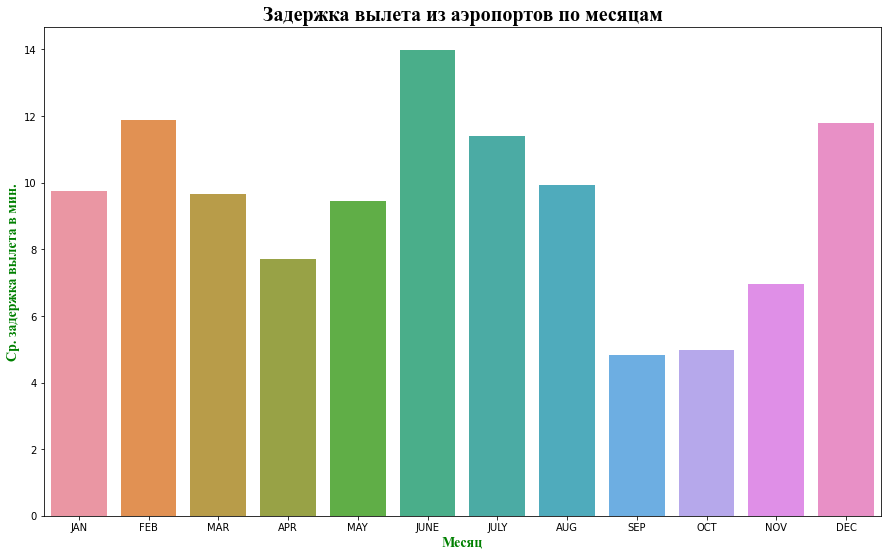

In [30]:
df_month = flights_1.loc[:, ['MONTH', 'DEPARTURE_DELAY']]
df_month = df_month.groupby('MONTH', as_index=False).agg({'DEPARTURE_DELAY':'mean'}).replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                      ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 
                                       'JULY', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
sns.barplot(x=df_month['MONTH'], y=df_month['DEPARTURE_DELAY'])
plt.xlabel('Месяц',fontdict=labels_dict)
plt.ylabel('Ср. задержка вылета в мин.',fontdict=labels_dict)
plt.title('Задержка вылета из аэропортов по месяцам',fontdict=title_dict);

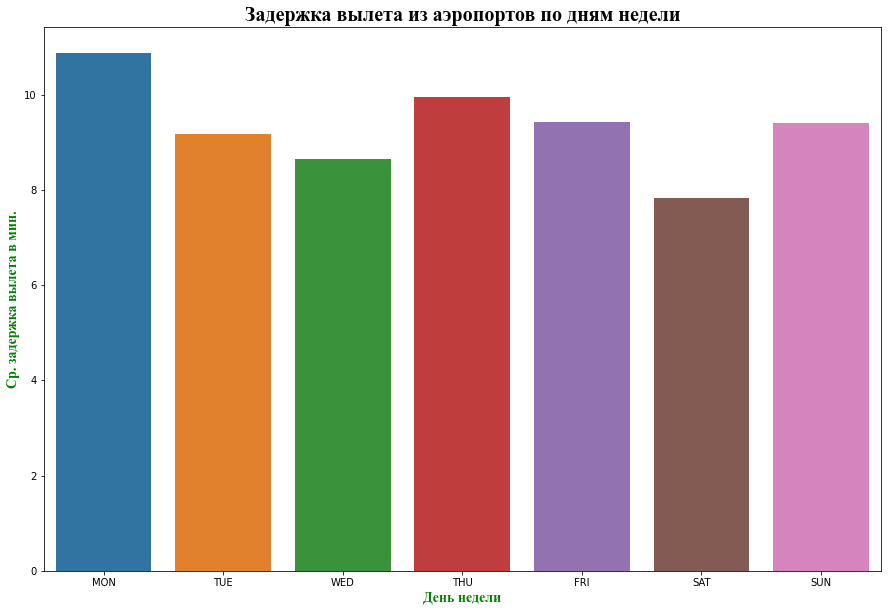

In [31]:
df_day = flights_1.loc[:, ['DAY_OF_WEEK', 'DEPARTURE_DELAY']]
df_day = df_day.groupby('DAY_OF_WEEK', as_index=False).agg({'DEPARTURE_DELAY':'mean'}).replace([1, 2, 3, 4, 5, 6, 7],
                                      ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
sns.barplot(x=df_day['DAY_OF_WEEK'], y=df_day['DEPARTURE_DELAY'])
plt.xlabel('День недели',fontdict=labels_dict)
plt.ylabel('Ср. задержка вылета в мин.',fontdict=labels_dict)
plt.title('Задержка вылета из аэропортов по дням недели',fontdict=title_dict);

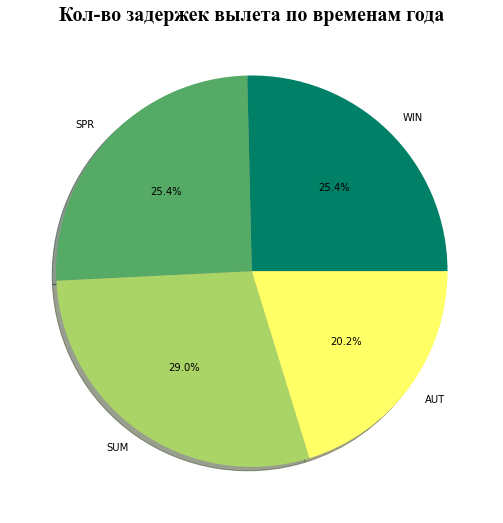

In [58]:
df_m = pd.DataFrame()
df_m['WIN'] = flights_1[flights_1['DEPARTURE_DELAY']>0].groupby(['MONTH']).agg({'ORIGIN_AIRPORT': 'count'}).iloc[[11,0,1]].sum()
df_m['SPR'] = flights_1[flights_1['DEPARTURE_DELAY']>0].groupby(['MONTH']).agg({'ORIGIN_AIRPORT': 'count'}).iloc[[2,3,4]].sum()
df_m['SUM'] = flights_1[flights_1['DEPARTURE_DELAY']>0].groupby(['MONTH']).agg({'ORIGIN_AIRPORT': 'count'}).iloc[[5,6,7]].sum()
df_m['AUT'] = flights_1[flights_1['DEPARTURE_DELAY']>0].groupby(['MONTH']).agg({'ORIGIN_AIRPORT': 'count'}).iloc[[8,9,10]].sum()
df_m = df_m.rename(index={'ORIGIN_AIRPORT': 'DEP_COUNT'})
df_m.T.plot.pie(autopct="%.1f%%",
                                           legend = False,
                                           subplots=True,
                                           figsize=(10,9),
                                           shadow =True,
                                           colormap='summer'
                                           )
plt.ylabel("")
plt.title('Кол-во задержек вылета по временам года',fontdict=title_dict);

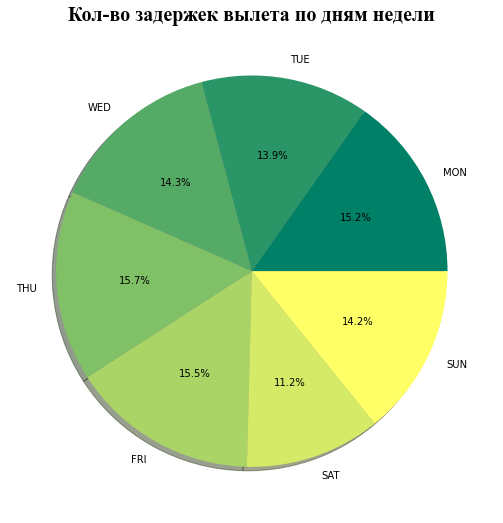

In [57]:
flights_1[flights_1['DEPARTURE_DELAY']>0].groupby(['DAY_OF_WEEK']).agg({'ORIGIN_AIRPORT': 'count'})\
        .rename(index = {1:'MON', 2:'TUE', 3:'WED', 4:'THU', 5:'FRI', 6:'SAT', 7:'SUN'},columns = {"ORIGIN_AIRPORT":"DEP_COUNT"})\
        .plot.pie(autopct="%.1f%%",
                                           legend = False,
                                           subplots=True,
                                           figsize=(10,9),
                                           shadow =True,
                                           colormap='summer'
                                          )
plt.ylabel("")
plt.title('Кол-во задержек вылета по дням недели',fontdict=title_dict);

Минимальные задежки вылета из аэропортов в субботу и осенью, а максимальные по понедельникам и летом.
Возможно задержки связаны с полетами по работе и большим количествов пассажиров, которые отправляются в отпуск.

# Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport

<img src='http://d.zaix.ru/9pzI.jpg'>
<p>Для решения этой задачи нам понадобятся две таблицы <b>flights</b> и <b>airlines</b></p>
<p>Сверим столбцы для объединения</p>

In [125]:
col1 = flights_1.AIRLINE.to_list()
col2 = airlines.IATA_CODE.to_list()
print('Разница - ', len(set.difference(set(col1), set(col2))),'\n''Значения - ', set.difference(set(col1), set(col2)))

print(flights_1.AIRLINE.nunique())
print(airlines.IATA_CODE.nunique())

Разница -  0 
Значения -  set()
14
14


Данные в двух столбцах совпадают, переименуем столбы в таблице <b>airlines</b> для объединения

In [62]:
airlines = airlines.rename(columns={'AIRLINE': 'FULL_NAME_AIRLINE','IATA_CODE': 'AIRLINE'})
airlines

,AIRLINE,FULL_NAME_AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [63]:
df2= flights_1.merge(airlines, on = 'AIRLINE')
df2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FULL_NAME_AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,115,...,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


Найдем самую пунктуальную авиакомпанию на прилет в LA

In [128]:
airports[airports['AIRPORT'] == 'Los Angeles International Airport']

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
176,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807


In [20]:
df_la = df2[df2['DESTINATION_AIRPORT'] == 'LAX']

In [22]:
df_la.groupby('FULL_NAME_AIRLINE', as_index = False).agg({'ARRIVAL_DELAY':'mean'}).sort_values('ARRIVAL_DELAY').head(1)

,FULL_NAME_AIRLINE,ARRIVAL_DELAY
5,Hawaiian Airlines Inc.,-4.653317


## Визуализация

Посмотрим на количество опозданий и своевременных прилетов в разрезе авиакомпаний

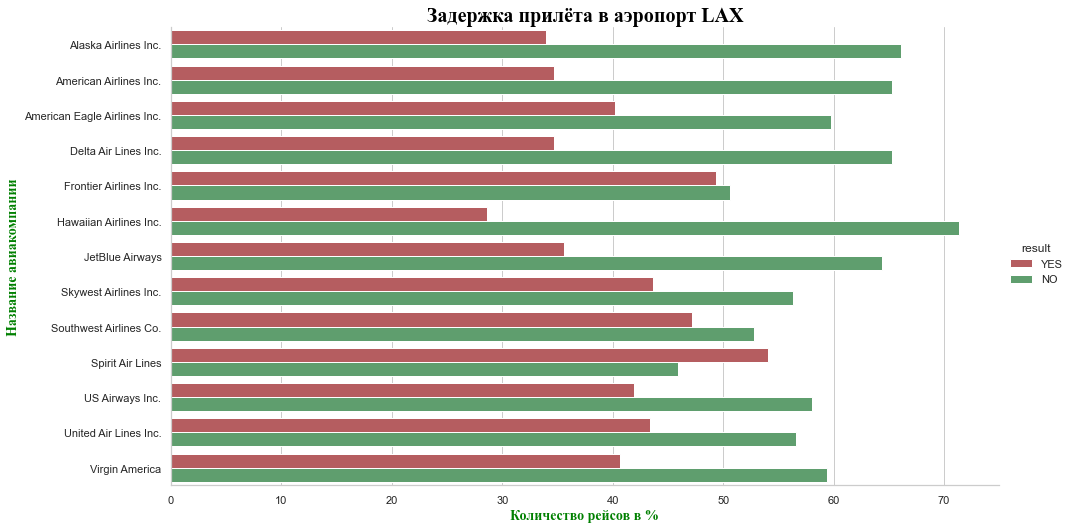

In [71]:
df_la['result'] = np.where(df_la['ARRIVAL_DELAY'] > 0, 'YES', 'NO')
df_la = round((df_la.groupby(['FULL_NAME_AIRLINE','result']).agg({'result':'count'})/df_la.groupby('FULL_NAME_AIRLINE').agg({'result':'count'})*100),2)
df_la=df_la.rename(columns={'result':'res_prc'})
df_la = df_la.reset_index()
sns.catplot(
    y='FULL_NAME_AIRLINE',
    x = 'res_prc',
    data=df_la, 
    kind='bar', 
    hue='result', 
    hue_order=['YES','NO'], 
    palette={"YES": "r", "NO": "g"}, 
    height=7,
aspect=2)
plt.xlabel('Количество рейсов в %',fontdict=labels_dict)
plt.ylabel('Название авиакомпании',fontdict=labels_dict)
plt.title('Задержка прилёта в аэропорт LAX',fontdict=title_dict);


На графике видно, что количество опозданий компании <b>Hawaiian Airlines Inc.</b> намного меньше своевременных прилетов в аэропорт.

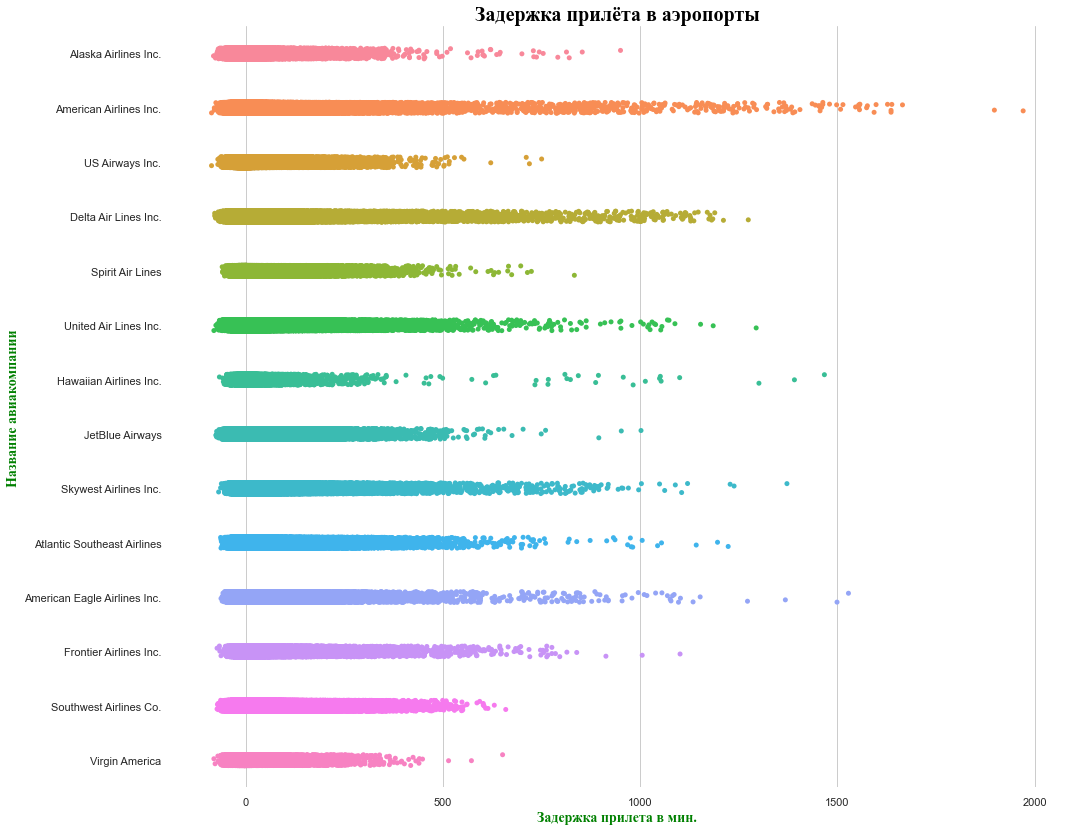

In [42]:
sns.set(style="whitegrid")
plt.subplots(figsize=(16,14))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="FULL_NAME_AIRLINE",
              data=df2, dodge=True, jitter=True)
plt.xlabel('Задержка прилета в мин.',fontdict=labels_dict)
plt.ylabel('Название авиакомпании',fontdict=labels_dict)
plt.title('Задержка прилёта в аэропорты',fontdict=title_dict);

У компании American Airlines больше всего и самые длительные задержки прилета (по всем аэропортам США)

# Аэропорт с самой большой долей руления на 1 самолетовылет

<img src ='https://s.fishki.net/upload/users/2020/05/16/1035285/f434dd793dfd6aad630ff20111f3a6b9.jpg'>

In [222]:
flights_1.sample(5).T

,3857917,4229174,2708532,3819673,461429
YEAR,2015,2015,2015,2015,2015
MONTH,8,9,6,8,1
DAY,27,21,20,25,31
DAY_OF_WEEK,4,1,6,2,6
AIRLINE,B6,DL,OO,UA,OO
FLIGHT_NUMBER,778,792,3482,1749,2720
TAIL_NUMBER,N516JB,N633DL,N223AG,N76516,N821AS
ORIGIN_AIRPORT,LAS,PBI,SEA,SFO,PHX
DESTINATION_AIRPORT,BOS,ATL,SBA,OGG,YUM
SCHEDULED_DEPARTURE,2352,700,745,1652,945


Найдем аэропорт самой большой долей руления на 1 самолетовылет

In [59]:
df1 = (flights_1.groupby(['ORIGIN_AIRPORT']).agg({'TAXI_OUT':'sum'})/flights_1.groupby(['ORIGIN_AIRPORT']).agg({'TAXI_OUT':'count'}))\
.sort_values('TAXI_OUT',ascending=False).head(1)
df1

,TAXI_OUT
ORIGIN_AIRPORT,
JFK,26.734585


In [60]:
airports[airports['IATA_CODE'] == df1.index[0]]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
166,JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893


## Визуализация

In [22]:
df = flights_1[flights_1['ORIGIN_AIRPORT'] == 'JFK'].groupby('MONTH', as_index=False).agg({'TAXI_OUT':'sum'}).replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                      ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 
                                       'JULY', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

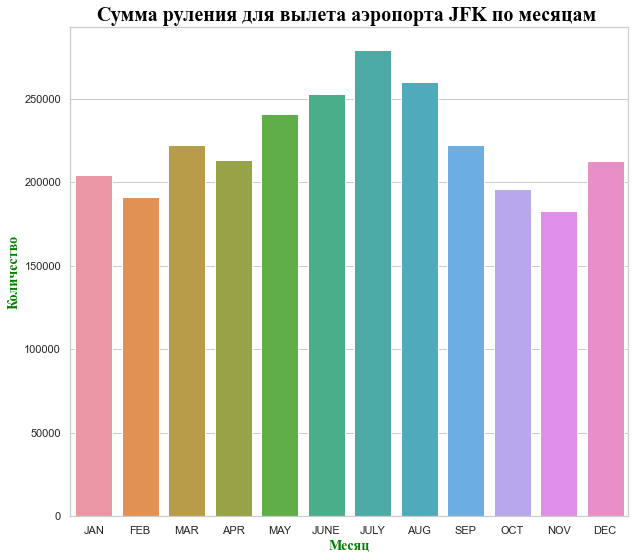

In [37]:
sns.set(style="whitegrid")
sns.barplot(x=df['MONTH'], y=df['TAXI_OUT'])
plt.rcParams['figure.figsize'] = (10,9)
plt.xlabel('Месяц',fontdict=labels_dict)
plt.ylabel('Количество',fontdict=labels_dict)
plt.title('Сумма руления для вылета аэропорта JFK по месяцам ',fontdict=title_dict);

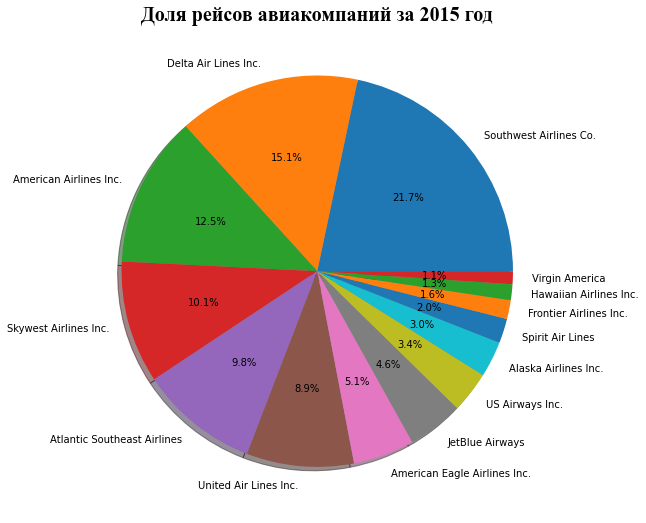

In [73]:
(df2.FULL_NAME_AIRLINE.value_counts()/len(df2)*100).plot(kind='pie',figsize=(10,9),autopct="%.1f%%",shadow =True)
plt.ylabel("")
plt.title('Доля рейсов авиакомпаний за 2015 год',fontdict=title_dict);

# Построить модель которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика),  в зависимости от аэропорта вылета  


<img src='https://i.ytimg.com/vi/02qua8fpTzc/hqdefault.jpg'>

In [4]:
%%time
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.dDate.dt.year
    data['month'] = data.dDate.dt.month
    data['day'] = data.dDate.dt.day
    data['dayofweek'] = data.dDate.dt.dayofweek
    data['is_weekend'] = data.dayofweek.isin([5,6])*1
    data['y_mean'] = data['ARRIVAL_DELAY'].shift().rolling(rolling_mean_size).mean()
    data['y_StD']=data['ARRIVAL_DELAY'].shift().rolling(6).std()

    data['expanding_mean'] = data['ARRIVAL_DELAY'].expanding(3).mean()
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['ARRIVAL_DELAY'].shift(lag)
        
flights_1['dDate'] = pd.to_datetime(flights_1[['YEAR','MONTH', 'DAY']])

Wall time: 838 ms


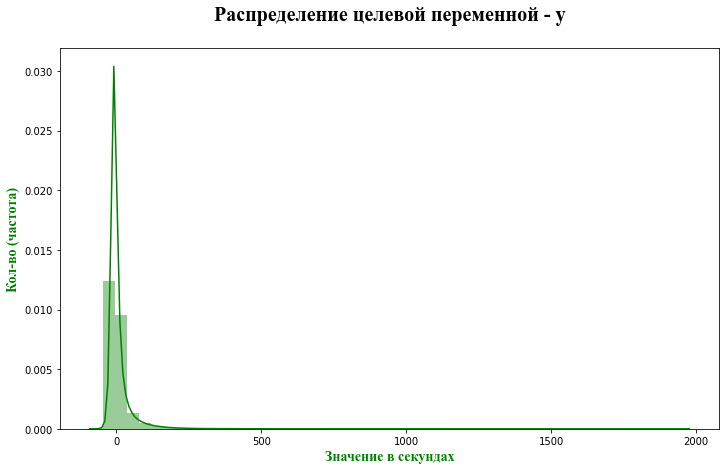

In [6]:
plt.figure(figsize=(26,7))
plt.subplot(121)
sns.distplot(flights_1.ARRIVAL_DELAY, bins=50, color='g')
plt.title('Распределение целевой переменной - y\n',fontdict=title_dict)
plt.xlabel('Значение в секундах',fontdict=labels_dict); 
plt.ylabel('Кол-во (частота)',fontdict=labels_dict);

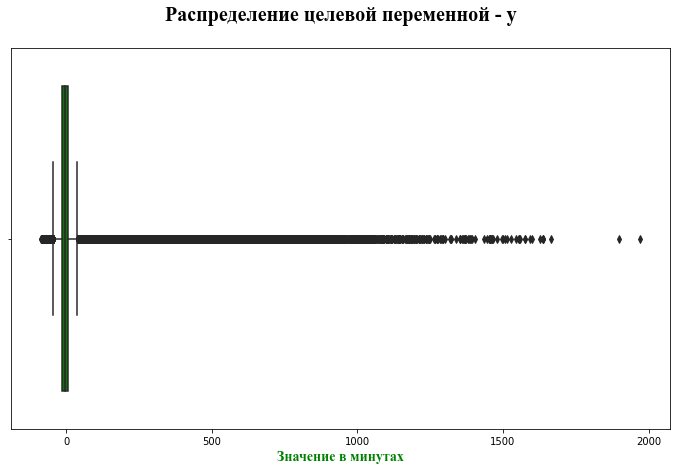

In [8]:
plt.figure(figsize=(26,7))

plt.subplot(122)
sns.boxplot(flights_1.ARRIVAL_DELAY, color='g')
plt.title('Распределение целевой переменной - y\n',fontdict=title_dict)
plt.xlabel('Значение в минутах',fontdict=labels_dict); 

Отберем для модели рейсы которые не были отклонены или перенесены в другой аэропорт, а также задержки более 120 минут случаются  редко, будем считать выбросами.

In [5]:
flights_1 = flights_1[(flights_1.CANCELLED==0) & (flights_1.DIVERTED==0)]

In [6]:
flights_1 = flights_1[flights_1.ARRIVAL_DELAY < 120]

In [7]:
%%time
flight_grouped = flights_1.groupby(['dDate','DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].sum().reset_index()

Wall time: 1.26 s


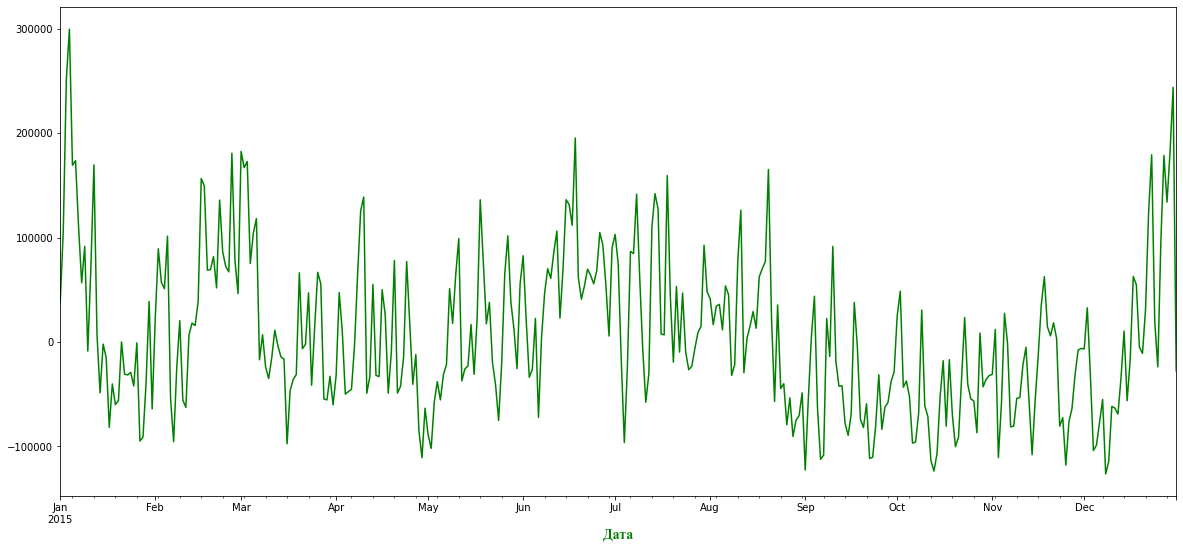

In [12]:
plt.figure(figsize=(20, 9))
flight_grouped.groupby(['dDate'])['ARRIVAL_DELAY'].sum().plot(color='g')
plt.xlabel('Дата',fontdict=labels_dict);

Максимальные задержки приходятся на новогодние праздники

Найдем оптимальные значения max_lag и rolling_mean_size

In [8]:
where_to_go_df = pd.DataFrame()
where_to_go = []
for i in tqdm(range (1,11)):
    for j in tqdm(range (1,21)):
        for dest in flight_grouped.DESTINATION_AIRPORT.unique():
            tempo = flight_grouped[flight_grouped.DESTINATION_AIRPORT==dest][['dDate','ARRIVAL_DELAY']]
            tempo.columns = ['dDate','ARRIVAL_DELAY']
            tempo = pd.DataFrame(tempo)

            try:
                make_features(tempo,j,i)
                tempo.dropna(inplace=True)
                tempo.set_index('dDate',inplace=True)
                tempo.drop('year', axis =1, inplace=True)

                X_train,X_test,y_train, y_test = train_test_split(tempo.drop(['ARRIVAL_DELAY'], axis=1),tempo.ARRIVAL_DELAY, shuffle=False, test_size=0.25)
               
                model_rid = RidgeCV()
                model_rid.fit(X_train, y_train)

                y_predicted_r = model_rid.predict(X_test)
                where_to_go.append([dest,y_test.mean(),np.sqrt(mean_squared_error(y_test, y_predicted_r)),i, j])
            except Exception as e:
                print('Error', str(e))
where_to_go_df = pd.DataFrame(where_to_go)
where_to_go_df.columns = ['DESTINATION_AIRPORT','MEAN_ARRIVAL_DELAY_IN_PAST','RMSE', 'LAG', 'ROLL_SIZE']
bestrmse = where_to_go_df.groupby(['LAG','ROLL_SIZE']).agg({'RMSE': 'mean'}).idxmin()
bestrmse

RMSE    (7, 3)
dtype: object

In [13]:
%%time
where_to_go_st = []
where_to_go_lr = []
where_to_go_rid = []
where_to_go_xg = []
for dest in tqdm(flight_grouped.DESTINATION_AIRPORT.unique()):
    tempo = flight_grouped[flight_grouped.DESTINATION_AIRPORT==dest][['dDate','ARRIVAL_DELAY']]
    tempo.columns = ['dDate','ARRIVAL_DELAY']
    tempo = pd.DataFrame(tempo)

    try:
        make_features(tempo,bestrmse[0][0],bestrmse[0][1])
        tempo.dropna(inplace=True)
        tempo.set_index('dDate',inplace=True)
        tempo.drop('year', axis =1, inplace=True)

        X_train,X_test,y_train, y_test = train_test_split(tempo.drop(['ARRIVAL_DELAY'], axis=1),tempo.ARRIVAL_DELAY, shuffle=False, test_size=0.25)

                                         
        model_lr = LinearRegression()
        model_lr.fit(X_train,y_train)
        
        model_rid = RidgeCV()
        model_rid.fit(X_train, y_train)
        
        xgb = XGBRegressor(n_estimators=123, max_depth=8, eta=0.1, subsample=0.7, colsample_bytree=0.8)
        xgb.fit(X_train, y_train)

        
        y_predicted_lr = model_lr.predict(X_test)
        y_predicted_rid = model_rid.predict(X_test)
        y_predicted_xg = xgb.predict(X_test)

        where_to_go_lr.append([dest,y_test.mean(),np.sqrt(mean_squared_error(y_test, y_predicted_lr))])
        where_to_go_rid.append([dest,y_test.mean(),np.sqrt(mean_squared_error(y_test, y_predicted_rid))])
        where_to_go_xg.append([dest,y_test.mean(),np.sqrt(mean_squared_error(y_test, y_predicted_xg))])

    except Exception as e:
        print('Error', str(e))


Wall time: 2min 2s


In [14]:
%%time
where_to_go_lr = pd.DataFrame(where_to_go_lr)
where_to_go_lr.columns = ['DESTINATION_AIRPORT','MEAN_ARRIVAL_DELAY_IN_PAST','RMSE']
where_to_go_rid = pd.DataFrame(where_to_go_rid)
where_to_go_rid.columns = ['DESTINATION_AIRPORT','MEAN_ARRIVAL_DELAY_IN_PAST','RMSE']
where_to_go_xg = pd.DataFrame(where_to_go_xg)
where_to_go_xg.columns = ['DESTINATION_AIRPORT','MEAN_ARRIVAL_DELAY_IN_PAST','RMSE']

Wall time: 3 ms


In [26]:
%%time
start_airport = np.random.choice(flights_1['ORIGIN_AIRPORT'].unique())

where_to_go_from_start_airport = flights_1[flights_1.ORIGIN_AIRPORT==start_airport]['DESTINATION_AIRPORT'].unique()

where_to_go_from_start_airport = pd.DataFrame(where_to_go_from_start_airport)
where_to_go_from_start_airport.columns = ['DESTINATION_AIRPORT']

top3_lr = where_to_go_from_start_airport\
    .merge(where_to_go_lr,on='DESTINATION_AIRPORT',how='inner')\
    .sort_values(by=['RMSE','MEAN_ARRIVAL_DELAY_IN_PAST'],ascending=[True, True])\
    .head(3)
top3_rid = where_to_go_from_start_airport\
    .merge(where_to_go_rid,on='DESTINATION_AIRPORT',how='inner')\
    .sort_values(by=['RMSE','MEAN_ARRIVAL_DELAY_IN_PAST'],ascending=[True, True])\
    .head(3)
top3_xg = where_to_go_from_start_airport\
    .merge(where_to_go_xg,on='DESTINATION_AIRPORT',how='inner')\
    .sort_values(by=['RMSE','MEAN_ARRIVAL_DELAY_IN_PAST'],ascending=[True, True])\
    .head(3)

print('~LinearRegression~')
print('Лучшие направления с аэропорта',start_airport)
print('')
print(top3_lr)
print('')
print(100*'*')
print('')
print('~RidgeCV~')
print('Лучшие направления с аэропорта',start_airport)
print('')
print(top3_rid)
print(100*'*')
print('')
print('~XGBRegressor ~')
print('Лучшие направления с аэропорта',start_airport)
print('')
print(top3_xg)

~LinearRegression~
Лучшие направления с аэропорта PIT

   DESTINATION_AIRPORT  MEAN_ARRIVAL_DELAY_IN_PAST        RMSE
27                 CVG                 -119.622222  252.518387
19                 IAD                 -452.288889  493.025145
9                  RSW                 -110.555556  592.222634

****************************************************************************************************

~RidgeCV~
Лучшие направления с аэропорта PIT

   DESTINATION_AIRPORT  MEAN_ARRIVAL_DELAY_IN_PAST        RMSE
27                 CVG                 -119.622222  252.399899
19                 IAD                 -452.288889  491.405384
9                  RSW                 -110.555556  591.975931
****************************************************************************************************

~XGBRegressor ~
Лучшие направления с аэропорта PIT

   DESTINATION_AIRPORT  MEAN_ARRIVAL_DELAY_IN_PAST        RMSE
27                 CVG                 -119.622222  268.857069
19          

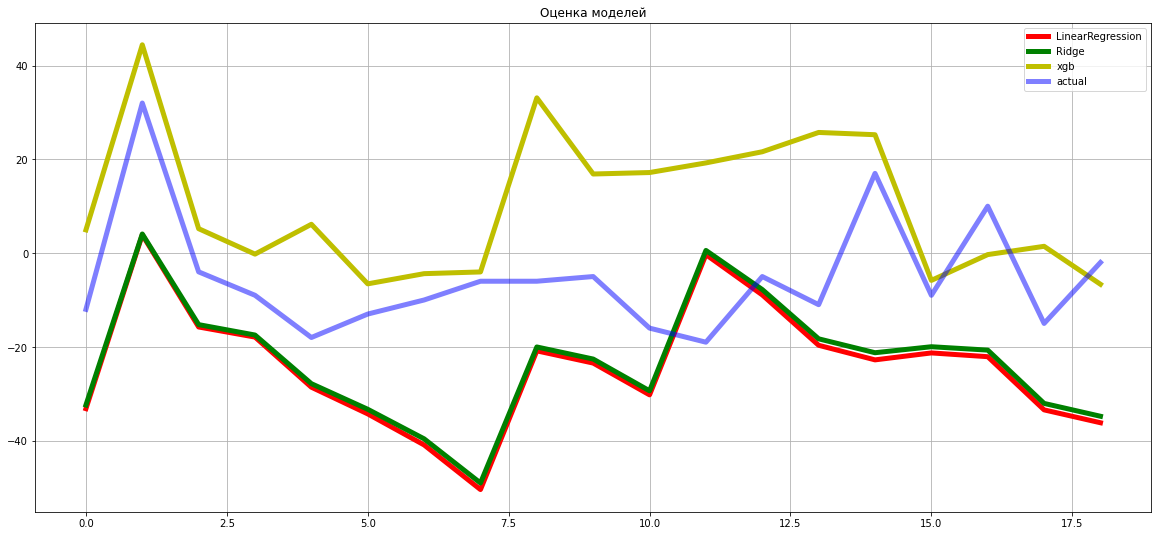

In [17]:
plt.figure(figsize=(20, 9))
plt.plot(y_predicted_lr, "r",linewidth=5, label="LinearRegression")
plt.plot(y_predicted_rid, "g",linewidth=5, label="Ridge")
plt.plot(y_predicted_xg, "y",linewidth=5, label="xgb")
plt.plot(y_test.values,'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);

In [18]:
result_df = pd.DataFrame([[where_to_go_lr.RMSE.min(), where_to_go_rid.RMSE.min(),where_to_go_xg.RMSE.min()],
                         [where_to_go_lr.RMSE.max(), where_to_go_rid.RMSE.max(),where_to_go_xg.RMSE.max()],
                         [where_to_go_lr.RMSE.mean(), where_to_go_rid.RMSE.mean(),where_to_go_xg.RMSE.mean()]],
                        columns = ['LinearReg','Ridge','Xgb'], index=['RMSE min', ' RMSE max', 'RMSE mean'])
result_df

,LinearReg,Ridge,Xgb
RMSE min,10.214607,10.551682,9.081857
RMSE max,6051.629584,6042.762919,7596.761915
RMSE mean,315.358022,314.919212,351.583866


<b>Вывод:</b> Качество модели зависит от количества данных для каждого аэропорта, чем больше вылетов, тем лучше результаты предсказания. Для улучшения качества модели, можно лучше поработать с выбросами, исключить аэропорты с малым количеством прилетов в аэропорт и большим разбросом в данных.